## School Area Analysis

In [108]:
# COMMENTS LAYOUT:
# ---------------------------------------------------------------- 
#Hello - This will be the main header - section of comments - HEADING comments 
# * Theses type of comments will be commented out to outline my thoughts - WALKTHROUGH comments
# ? Theses type of comments will be commented out to clarify complex code - CLARIFICATION comments
# ! This type of comments will be used to update/fix my code/improve it for next time - ACTION/IMPROVEMENT comments
# todo - These type of comments will be used to outline new trick/function process- FLOW/HOW? commentsm
    # todo --> Example: Creating a pivot table with pandas -- Include the following arguments: [index = , coluns = , values = ,aggfunc = , margins = ]


#### Importing libraries

In [109]:
import pandas as pd
from ydata_profiling import ProfileReport # ? We will use this library to create an html report to explore the data numerically and statistically
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 7
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (6, 3)

#### Loading data & Memory optimisation

In [110]:
school_path = "/Users/galbeeir/Desktop/git/pandas-challenge/PyCitySchools/Starter_Code/PyCitySchools/Resources/schools_complete.csv"
student_path = "/Users/galbeeir/Desktop/git/pandas-challenge/PyCitySchools/Starter_Code/PyCitySchools/Resources/students_complete.csv"

school_data = pd.read_csv(school_path,
                          dtype = {'school_id': 'category',
                                   'type': 'category',
                                   'size': 'Int16', 
                                   'budget': 'Int32'})
student_data = pd.read_csv(student_path, 
                           dtype = {'student_id': 'category',
                                    'gender': 'category',
                                    'year': 'Int8',
                                    'reading_score': 'Int8', 
                                    'math_score': 'Int8'})

# By changing the dtyps of our dataframe columns we saved over 6 mb which can be substantial in specific circumstances. 

In [111]:
# Are there NaN values within our datasets? 
# * ------------------------------------------------------------------------------------------------
    # * As we can see, there are no NA/NaN values within our dataset
print(f"""
SCHOOL DATA SUMMARY: 
________________________________________________________________
{school_data.isnull().sum()}

STUDENT DATA SUMMARY:
________________________________________________________________
{student_data.isnull().sum()}""")




SCHOOL DATA SUMMARY: 
________________________________________________________________
School ID      0
school_name    0
type           0
size           0
budget         0
dtype: int64

STUDENT DATA SUMMARY:
________________________________________________________________
Student ID       0
student_name     0
gender           0
year             0
school_name      0
reading_score    0
maths_score      0
dtype: int64


In [112]:
# Were there any "special string cases" for NULL values (i.e. 'BLANK', 'EMPTY' etc..)? 
# * ------------------------------------------------------------------------------------------------
    # * As we can see, there weren't any special cases for NULL values. 

print(f"""
SCHOOL DATA SUMMARY: 
________________________________________________________________
{school_data.value_counts(dropna=False)}

STUDENT DATA SUMMARY:
________________________________________________________________
{student_data.value_counts(dropna=True)}""")


SCHOOL DATA SUMMARY: 
________________________________________________________________
School ID  school_name            type         size  budget 
0          Huang High School      Government   2917  1910635    1
1          Figueroa High School   Government   2949  1884411    1
2          Shelton High School    Independent  1761  1056600    1
3          Hernandez High School  Government   4635  3022020    1
4          Griffin High School    Independent  1468  917500     1
5          Wilson High School     Independent  2283  1319574    1
6          Cabrera High School    Independent  1858  1081356    1
7          Bailey High School     Government   4976  3124928    1
8          Holden High School     Independent  427   248087     1
9          Pena High School       Independent  962   585858     1
10         Wright High School     Independent  1800  1049400    1
11         Rodriguez High School  Government   3999  2547363    1
12         Johnson High School    Government   4761  309465

In [113]:
# MERGING THE DATSETS
merged_df = pd.merge(left= student_data,
                     right= school_data,
                     how= 'left',
                     on = ["school_name", "school_name"])

#### Exploring our dataset numerically and statistically using ydata_profiling

In [114]:
# USE YDATA_PROFILING to export the HTML analysis report report
    # todo GENERATING the HTML report based on a sample dataset of 6000 records, using random_state of 2023
sample_dataset = merged_df.sample(6000, random_state=2023)
sample_dataset.head()

,Student ID,student_name,gender,year,school_name,reading_score,maths_score,School ID,type,size,budget
19816,19816,Linda Graves,F,9,Bailey High School,71,56,7,Government,4976,3124928
15973,15973,Sandra Castillo,F,11,Wilson High School,51,47,5,Independent,2283,1319574
5915,5915,Carla Brown,F,10,Shelton High School,67,98,2,Independent,1761,1056600
23662,23662,Angela Murillo,F,10,Pena High School,49,76,9,Independent,962,585858
7732,7732,Karen Dudley,F,12,Hernandez High School,51,44,3,Government,4635,3022020


In [115]:
profile = ProfileReport(sample_dataset, title="School Analysis Report")

# Generating HTML report
profile.to_notebook_iframe()

# Exporting the HTML report 
profile.to_file("/Users/galbeeir/Desktop/git/pandas-challenge/PyCitySchools/Starter_Code/SchoolAnalysis_Hreport.html")

#### Performing the necessary calculations and appending the to a summary datafame - Local Government Area (LGA) Summary
Calculations: 
* Total number of unique schools
* Total budget
* Total students
* Average maths score
* Average reading score
* % passing maths (the percentage of students who passed maths)
* % passing reading (the percentage of students who passed reading)
* % overall passing (the percentage of students who passed maths AND reading)

In [116]:
total_schools = merged_df['School ID'].nunique()
total_schools

15

In [117]:
total_students = merged_df['Student ID'].nunique()
total_students

39170

In [118]:
total_budget = merged_df['budget'].unique().sum() 
total_budget

24649428

In [119]:
avg_math_score = merged_df['maths_score'].mean().round(6)
avg_math_score

70.338192

In [120]:
avg_reading_score = merged_df['reading_score'].mean().round(6)
avg_reading_score

69.980138

In [121]:
math_pass = merged_df.loc[merged_df['maths_score'] >=50]
per_passing_math = ((len(math_pass) / len(merged_df)) * 100).__round__(6)
per_passing_math

86.078632

In [122]:
reading_pass = merged_df.loc[merged_df['reading_score'] >=50]
per_passing_reading = ((len(reading_pass) / len(merged_df)) * 100).__round__(6)
per_passing_reading

84.426857

In [123]:
mask = (merged_df['reading_score'] >= 50) & (merged_df['maths_score'] >= 50)
overall_passed = merged_df.loc[mask]
per_overall_passed = ((len(overall_passed) / len(merged_df)) * 100).__round__(6)
per_overall_passed

72.808272

In [124]:
summary_data = pd.DataFrame(columns=['Total Schools', 'Total Students', 'Total Budget',
                                     'Average Maths Score', 'Average Reading Score',
                                     '% Passing Maths', '% Passing Reading',
                                     '% Overall Passing'])

new_data = pd.DataFrame({'Total Schools': [total_schools],
                         'Total Students': [total_students],
                         'Total Budget': [total_budget],
                         'Average Maths Score': [avg_math_score],
                         'Average Reading Score': [avg_reading_score],
                         '% Passing Maths': [per_passing_math],
                         '% Passing Reading': [per_passing_reading],
                         '% Overall Passing': [per_overall_passed]})

summary_data = pd.concat([summary_data, new_data], ignore_index=True)
summary_data

,Total Schools,Total Students,Total Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
0,15,39170,24649428,70.338192,69.980138,86.078632,84.426857,72.808272


### School Summary
Calculations:
* School type
* School name
* Total students
* Total school budget
* Per student budget
* Average maths score
* Average reading score
* % passing maths (the percentage of students who passed maths)
* % passing reading (the percentage of students who passed reading)
* % overall passing (the percentage of students who passed maths AND reading)

In [125]:
# Creating a subset from merged_df for school summary
    # * Sense merged_df DataFrame contains some of the initial results for our school summary we are create a initial table by referring to the relevent columns 
school_summary = (merged_df.drop_duplicates(subset="budget")
                  .loc[:, ['school_name','size', 'budget', 'type']]
                  .set_index('school_name')
                  .rename(columns={'size': 'Total Students', 'budget': 'Total Budget', 'type': 'School Type'})
                  .reindex(['School Type','Total Students', 'Total Budget'],axis =1))

school_summary.sort_index(inplace=True) # ? We have to sort the school name column in ascending order (this will be the order in which the summary table will be organized)

In [126]:
# Adding the 'Per Student Budget' column 
school_summary['Per Student Budget'] = school_summary['Total Budget'] / school_summary['Total Students']

In [127]:
# Creating the average math & reading scores
average_math = merged_df.groupby('school_name')['maths_score'].mean()
average_reading = merged_df.groupby('school_name')['reading_score'].mean()
average_reading.sort_index(inplace=True)
average_math.sort_index(inplace=True)

In [128]:
# Adding the following of columns to our summary table
school_summary['Average Math Score'] = average_math.values
school_summary['Average Reading Score'] = average_reading.values

In [129]:
# Calculating the percentage_passed_math
percentage_passed_math = math_pass.groupby('school_name').size() / merged_df.groupby('school_name').size() * 100
percentage_passed_math.sort_index(inplace=True)

In [130]:
# Calculating the percentage_passed_math
    # ? Size provides the length of the #N of rows within a given df/Series
percentage_passed_reading = reading_pass.groupby('school_name').size() / merged_df.groupby('school_name').size() * 100
percentage_passed_reading.sort_index(inplace=True)

In [131]:
# Adding the following columns
school_summary['% Passing Math'] = percentage_passed_math.values
school_summary['% Passing Reading'] = percentage_passed_reading.values

In [132]:
# Filtering our df so that both reading & math scores are >= 50 using mask variable
mask = (merged_df['reading_score'] >= 50) & (merged_df['maths_score'] >= 50)

# Calculating the overall passing average
overall_passing = merged_df.loc[mask]
overall_passing_percentage = overall_passing.groupby('school_name').size() / merged_df.groupby('school_name').size() * 100
overall_passing_percentage.sort_index(inplace=True)

In [133]:
school_summary['% Overall Passing'] = overall_passing_percentage.values
school_summary

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,Government,4976,3124928,628.0,72.352894,71.008842,91.639871,87.379421,80.084405
Cabrera High School,Independent,1858,1081356,582.0,71.657158,71.359526,90.850377,89.074273,80.785791
Figueroa High School,Government,2949,1884411,639.0,68.698542,69.077993,81.654798,82.807731,67.650051
Ford High School,Government,2739,1763916,644.0,69.091274,69.572472,82.438846,82.219788,67.469880
Griffin High School,Independent,1468,917500,625.0,71.788147,71.245232,91.212534,88.487738,81.335150
Hernandez High School,Government,4635,3022020,652.0,68.874865,69.186408,80.949299,81.877023,66.364617
Holden High School,Independent,427,248087,581.0,72.583138,71.660422,89.929742,88.524590,78.922717
Huang High School,Government,2917,1910635,655.0,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,3094650,650.0,68.843100,69.039277,82.062592,81.978576,67.191766


#### Highest and Lowest Perfoming Schools

In [134]:
# HIGHEST
school_summary.sort_values('% Overall Passing', ascending=False).iloc[:5]

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Griffin High School,Independent,1468,917500,625.0,71.788147,71.245232,91.212534,88.487738,81.335150
Cabrera High School,Independent,1858,1081356,582.0,71.657158,71.359526,90.850377,89.074273,80.785791
Bailey High School,Government,4976,3124928,628.0,72.352894,71.008842,91.639871,87.379421,80.084405
Wright High School,Independent,1800,1049400,583.0,72.047222,70.969444,91.777778,86.666667,79.722222
Rodriguez High School,Government,3999,2547363,637.0,72.047762,70.935984,90.797699,87.396849,79.419855


In [135]:
# LOWEST
school_summary.sort_values('% Overall Passing').iloc[:5]

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Hernandez High School,Government,4635,3022020,652.0,68.874865,69.186408,80.949299,81.877023,66.364617
Huang High School,Government,2917,1910635,655.0,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,3094650,650.0,68.843100,69.039277,82.062592,81.978576,67.191766
Wilson High School,Independent,2283,1319574,578.0,69.170828,68.876916,82.785808,81.296540,67.455103
Ford High School,Government,2739,1763916,644.0,69.091274,69.572472,82.438846,82.219788,67.469880


#### Math & Reading Score by Year

In [136]:
# MATH SCORE PIVOT TABLE
(merged_df
 .pivot_table(
    index = 'school_name',
    columns = 'year',
    values= ['maths_score'],
    aggfunc= 'mean'
)
.droplevel(0, axis=1)
.rename_axis(None, axis= 1)
.rename(columns = {9:'Year 9', 10: 'Year 10', 11:'Year 11', 12:'Year 12'})
.style.background_gradient(cmap='BuGn', axis=None))

,Year 9,Year 10,Year 11,Year 12
school_name,,,,
Bailey High School,72.493827,71.897498,72.374900,72.675097
Cabrera High School,72.321970,72.437768,71.008299,70.604712
Figueroa High School,68.477804,68.331586,68.811001,69.325282
Ford High School,69.021609,69.387006,69.248862,68.617811
Griffin High School,72.789731,71.093596,71.692521,71.469178
Hernandez High School,68.586831,68.867156,69.154412,68.985075
Holden High School,70.543307,75.105263,71.640777,73.409639
Huang High School,69.081754,68.533246,69.431345,68.639316
Johnson High School,69.469286,67.990220,68.637730,69.287393


***Math Pivot Insights***: 
* **Holden High School** scored the highest in year 10 and Year 12. 
* Bailey, Cabrera, Griffin, Pena, Rodrigues, Shelton, and Wright schools **scored above the average of 70**, while the rest, excluding Holden High School, **scored below the average of 70**.

In [137]:
# READING SCORE PIVOT TABLE 
(merged_df
 .pivot_table(
    index = 'school_name',
    columns = 'year',
    values= ['reading_score'],
    aggfunc= 'mean'
)
.droplevel(0, axis=1)
.rename_axis(None, axis= 1)
.rename(columns = {9:'Year 9', 10: 'Year 10', 11:'Year 11', 12:'Year 12'})
.style.background_gradient(cmap='PuBu', axis=None))

,Year 9,Year 10,Year 11,Year 12
school_name,,,,
Bailey High School,70.901920,70.848265,70.317346,72.195525
Cabrera High School,71.172348,71.328326,71.201245,71.856021
Figueroa High School,70.261682,67.677588,69.152327,69.082126
Ford High School,69.615846,68.988701,70.735964,68.849722
Griffin High School,72.026895,70.746305,72.385042,69.434932
Hernandez High School,68.477569,70.621842,68.418199,69.244136
Holden High School,71.598425,71.096491,73.310680,70.481928
Huang High School,68.670616,69.516297,68.740638,68.671795
Johnson High School,68.719286,69.295029,69.969115,67.992521


***Reading Pivot Insights***: 
* **Holden High School** scored the highest in year 11. 
* Bailey, Cabrera, Griffin, Pena, Rodrigues, Shelton, and Wright schools **scored above the average of 70** (*Group 1*), while the rest, excluding Holden High School, **scored below the average of 70** in most years (*Group 2*)
* Based on the reading and math pivot tables, Group 2 underperformed relative to Group 1. Further, Holden high school performance was, overall, higher than the average of both Group 1 and Group 2. 

### Scores by School Spending

#### School performance breakdown by spending ranges per student

In [138]:
# Defining the spending bins and labels
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [139]:
# Applying pd.cut to create a new column within the school_summry df and applying the spending_bins and labels provided
school_summary['Spending Ranges (Per Student)'] = pd.cut(school_summary['Per Student Budget'], spending_bins, labels=labels)
school_summary

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,Government,4976,3124928,628.0,72.352894,71.008842,91.639871,87.379421,80.084405,$585-630
Cabrera High School,Independent,1858,1081356,582.0,71.657158,71.359526,90.850377,89.074273,80.785791,<$585
Figueroa High School,Government,2949,1884411,639.0,68.698542,69.077993,81.654798,82.807731,67.650051,$630-645
Ford High School,Government,2739,1763916,644.0,69.091274,69.572472,82.438846,82.219788,67.469880,$630-645
Griffin High School,Independent,1468,917500,625.0,71.788147,71.245232,91.212534,88.487738,81.335150,$585-630
Hernandez High School,Government,4635,3022020,652.0,68.874865,69.186408,80.949299,81.877023,66.364617,$645-680
Holden High School,Independent,427,248087,581.0,72.583138,71.660422,89.929742,88.524590,78.922717,<$585
Huang High School,Government,2917,1910635,655.0,68.935207,68.910525,81.693521,81.453548,66.712376,$645-680
Johnson High School,Government,4761,3094650,650.0,68.843100,69.039277,82.062592,81.978576,67.191766,$645-680


In [140]:
# School performance breakdown by spending ranges per student => 
# * ----------------------------------------------------------------
final_table = school_summary.groupby('Spending Ranges (Per Student)').agg({
    'Average Math Score': 'mean',
    'Average Reading Score': 'mean',
    '% Passing Math': 'mean',
    '% Passing Reading': 'mean',
    '% Overall Passing': 'mean'
})
final_table.round(2)

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,71.36,70.72,88.84,86.39,76.72
$585-630,72.07,71.03,91.52,87.29,79.88
$630-645,69.85,69.84,84.69,83.76,71.00
$645-680,68.88,69.05,81.57,81.77,66.76


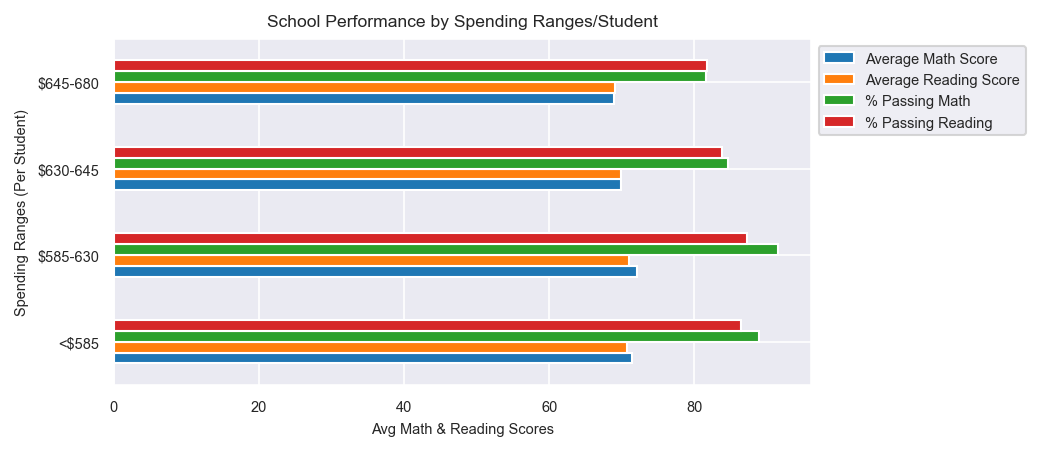

In [149]:
# School Performance by Spending Ranges/Student barh chart
(final_table
 .loc[:, 'Average Math Score':'% Passing Reading']
 .plot.barh(xlabel = "Avg Math & Reading Scores",
            title = "School Performance by Spending Ranges/Student"))
plt.legend(bbox_to_anchor = (1,1));

#### School performance breakdown by school size

In [142]:
# Defining the spending bins and labels
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [143]:
# Applying pd.cut to create a new column within the school_summry df and applying the spending_bins and labels provided
school_summary['School Size'] = pd.cut(school_summary['Total Students'], size_bins, labels=labels)

In [144]:
# School performance breakdown by school size => 
# * ----------------------------------------------------------------
final_size_table = school_summary.groupby('School Size').agg({
    'Average Math Score': 'mean',
    'Average Reading Score': 'mean',
    '% Passing Math': 'mean',
    '% Passing Reading': 'mean',
    '% Overall Passing': 'mean'
})
final_size_table

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),72.335748,71.636864,90.806867,87.557513,79.066348
Medium (1000-2000),71.421650,70.720164,89.846560,86.714149,78.039785
Large (2000-5000),69.751809,69.576052,84.252804,83.301185,70.293507


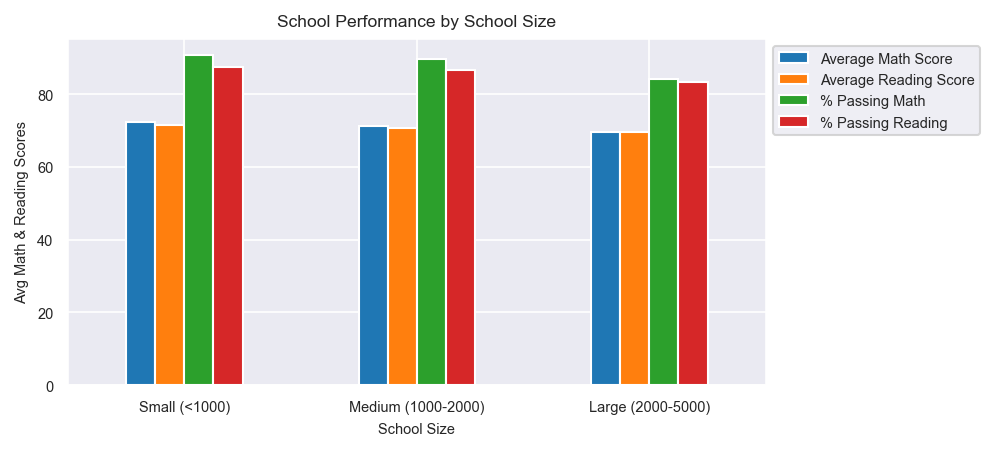

In [145]:
# "School Performance by School Size"
(final_size_table
 .loc[:, 'Average Math Score':'% Passing Reading']
 .plot.bar(title="School Performance by School Size",
           ylabel= "Avg Math & Reading Scores")  # Corrected line
 .tick_params(labelrotation=0)
)
plt.legend(bbox_to_anchor =(1, 1));


#### Scores by School Type

In [146]:
# School performance breakdown by school type => 
# * ----------------------------------------------------------------
summary_by_type = school_summary.groupby('School Type').agg({
    'Average Math Score': 'mean',
    'Average Reading Score': 'mean',
    '% Passing Math': 'mean',
    '% Passing Reading': 'mean',
    '% Overall Passing': 'mean'
})
summary_by_type

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Government,69.834806,69.675929,84.462375,83.587562,70.698993
Independent,71.368822,70.718933,89.204043,86.247789,76.973340


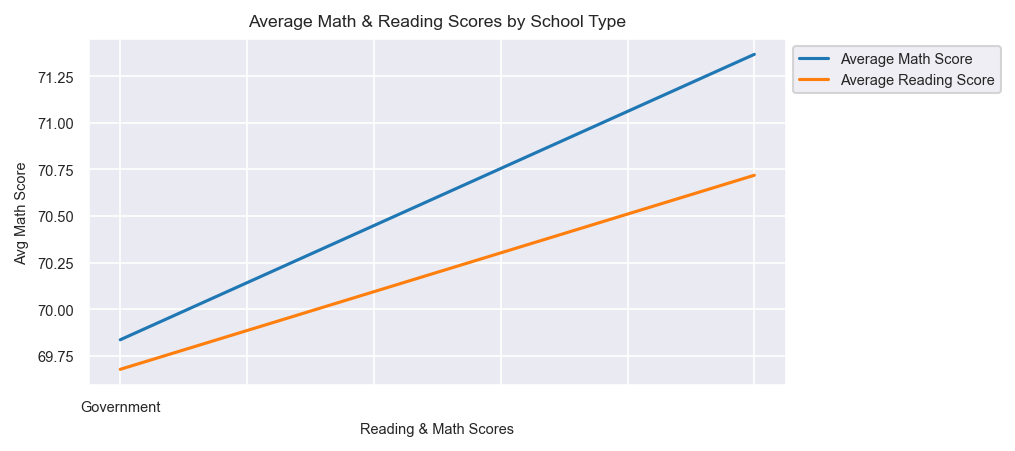

In [147]:
# AVERAGE MATH & READING SCORES BY SCHOOL TYPE
(summary_by_type.loc[:, ['Average Math Score', 'Average Reading Score']]
 .rename_axis(None, index=1)
 .plot(ylabel = "Avg Math Score",
       xlabel = "Reading & Math Scores",
       title = "Average Math & Reading Scores by School Type").legend(bbox_to_anchor = (1,1)));

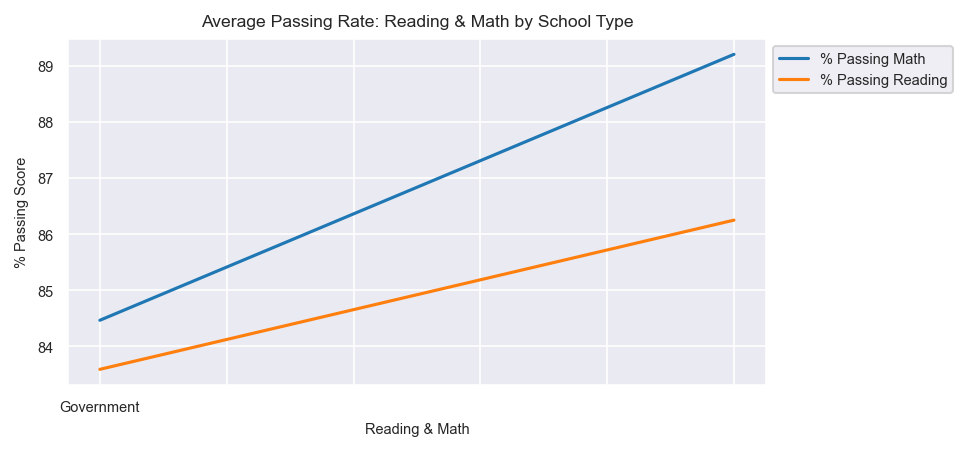

In [148]:
# AVERAGE PASSING RATE BY SCHOOL TYPE (MATH & READING)
(summary_by_type.loc[:, ['% Passing Math', '% Passing Reading']]
 .rename_axis(None, index=1)
 .plot(ylabel = "% Passing Score",
       xlabel = "Reading & Math",
       title = "Average Passing Rate: Reading & Math by School Type").legend(bbox_to_anchor = (1,1)));